In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diamonds_new (1).csv') 

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.shape

(53940, 9)

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [7]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [8]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [9]:
zero_index = data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index

In [10]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [11]:
data1=data.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

Text(0.5, 1.0, 'boxplot of x')

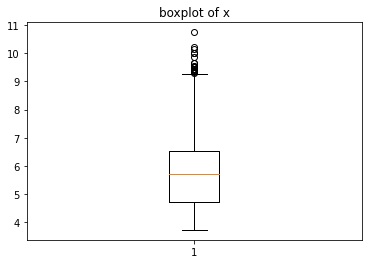

In [12]:
plt.boxplot(data1['x'])
plt.title('boxplot of x')

Text(0.5, 1.0, 'boxplot of y')

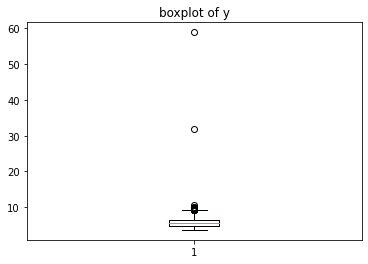

In [13]:
plt.boxplot(data1['y'])
plt.title('boxplot of y')

Text(0.5, 1.0, 'boxplot of z')

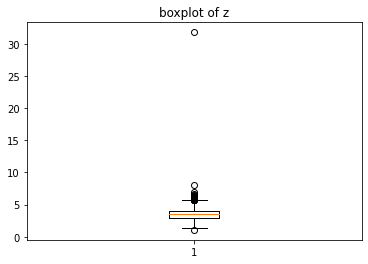

In [14]:
plt.boxplot(data1['z'])
plt.title('boxplot of z')

<function matplotlib.pyplot.show(*args, **kw)>

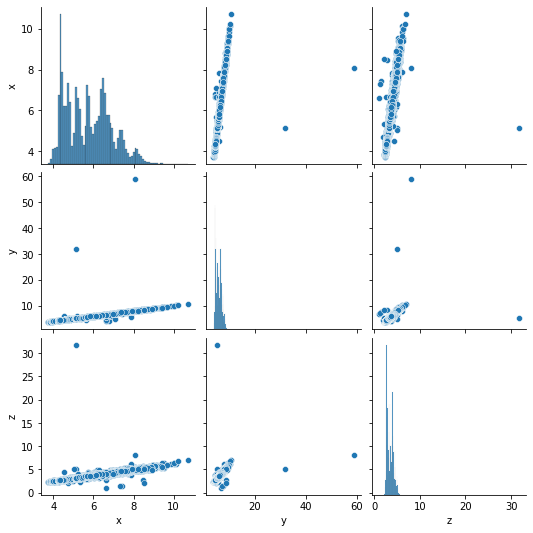

In [15]:
sns.pairplot(data1[['x','y','z']])
plt.show

In [16]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [17]:

data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [18]:
data2 = data1.drop([24067, 49189,48410])

In [19]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


In [20]:
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

(array([2.5153e+04, 1.8522e+04, 7.1270e+03, 2.3480e+03, 6.1300e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <a list of 10 Patch objects>)

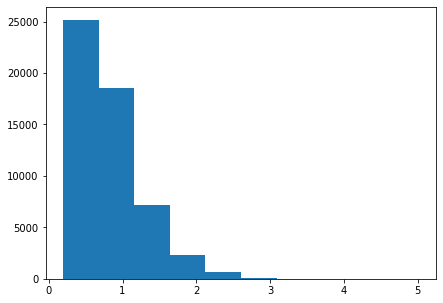

In [21]:
plt.figure(figsize=(7,5))
plt.hist(data2['carat'])


<function matplotlib.pyplot.show(*args, **kw)>

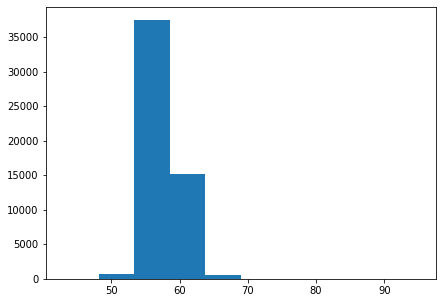

In [22]:
plt.figure(figsize=(7,5))
plt.hist(data2['table'])
plt.show

In [23]:
for i in ['carat','table']:
      data2[i]=data2[i].fillna(data2[i].median())

In [24]:
data2['color'] = data2['color'].fillna(data2['color'].mode()[0])

In [25]:
data2.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [26]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [27]:
data2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [28]:
data2['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [29]:
data2['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder=LabelEncoder()

In [32]:
data2['cut']=label_encoder.fit_transform(data2['cut'])

In [33]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,SI2,58.0,4.34,4.35,2.75,167.5


In [34]:
data2['color']=label_encoder.fit_transform(data2['color'])

In [35]:
data2['clarity']=label_encoder.fit_transform(data2['clarity'])

In [36]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,1,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5


In [37]:
data2.shape

(53929, 9)

In [112]:
X = data2.drop(['price_new'], axis=1)
y = data2['price_new']

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [114]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error,r2_score

In [116]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 448297.29110524413
R squared value is: 0.886294205516088


**MIN MAX SCALING**

In [117]:
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,2,1,3,55.0,3.95,3.98,2.43
1,0.21,3,1,2,61.0,3.89,3.84,2.31
2,0.23,1,1,4,65.0,4.05,4.07,2.31
3,0.29,3,5,5,58.0,4.20,4.23,2.63
4,0.31,1,6,3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,58.0,6.15,6.12,3.74


In [118]:
X.describe()

,carat,cut,color,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,2.594244,3.835135,57.457134,5.731986,5.733796,3.539523
std,0.473967,1.027659,1.701174,1.724708,2.234069,1.119649,1.111501,0.691693
min,0.200000,0.000000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,95.000000,10.740000,10.540000,6.980000


In [119]:
X1=X.drop(['cut', 'color', 'clarity'], axis=1)

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [122]:
X1=min_max_scaler.fit_transform(X1)

In [123]:
type(X1)


numpy.ndarray

In [124]:
X1=pd.DataFrame(X1,columns=['carat', 'table', 'x', 'y', 'z'])

In [125]:
X1.describe()

,carat,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.124297,0.278022,0.285590,0.299387,0.417855
std,0.098538,0.042963,0.159722,0.162026,0.117038
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.250000,0.139800,0.151603,0.311337
50%,0.103950,0.269231,0.281027,0.295918,0.416244
75%,0.174636,0.307692,0.400856,0.416910,0.502538
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
X1.isna().sum()

carat    0
table    0
x        0
y        0
z        0
dtype: int64

In [127]:
X1.shape

(53929, 5)

In [128]:
X.shape

(53929, 8)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [130]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [131]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 448297.29110524413
R squared value is: 0.886294205516088


**STANDARD SCALING**

In [132]:
X = data2.drop(['price_new'], axis=1)
y = data2['price_new']

In [133]:
X.describe()

,carat,cut,color,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,2.594244,3.835135,57.457134,5.731986,5.733796,3.539523
std,0.473967,1.027659,1.701174,1.724708,2.234069,1.119649,1.111501,0.691693
min,0.200000,0.000000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,95.000000,10.740000,10.540000,6.980000


In [134]:
X1=X.drop(['cut', 'color', 'clarity'], axis=1)

In [135]:
X1

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75
...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50
53936,0.72,55.0,5.69,5.75,3.61
53937,0.70,60.0,5.66,5.68,3.56
53938,0.86,58.0,6.15,6.12,3.74


In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
std_scl=StandardScaler()

In [138]:
X1=pd.DataFrame(X1,columns=['carat', 'table', 'x', 'y', 'z'])

In [139]:
X1.describe()

,carat,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,57.457134,5.731986,5.733796,3.539523
std,0.473967,2.234069,1.119649,1.111501,0.691693
min,0.200000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,6.540000,6.540000,4.040000
max,5.010000,95.000000,10.740000,10.540000,6.980000


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [141]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [142]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 448297.29110524413
R Squared Value is:  0.886294205516088


**NORMALIZATION**

In [143]:
X = data2.drop('price_new', axis=1)
y = data2['price_new']

In [144]:
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,2,1,3,55.0,3.95,3.98,2.43
1,0.21,3,1,2,61.0,3.89,3.84,2.31
2,0.23,1,1,4,65.0,4.05,4.07,2.31
3,0.29,3,5,5,58.0,4.20,4.23,2.63
4,0.31,1,6,3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,58.0,6.15,6.12,3.74


In [145]:
X1=X.drop(['cut', 'color', 'clarity'], axis=1)

In [146]:
from sklearn import preprocessing

In [147]:
X1 = preprocessing.normalize(X1)

In [148]:
X1 = pd.DataFrame(X1,columns =['carat', 'table', 'x', 'y', 'z'])

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [150]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [151]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 448297.29110524413
R Squared Value is:  0.886294205516088


**CORRELATION**

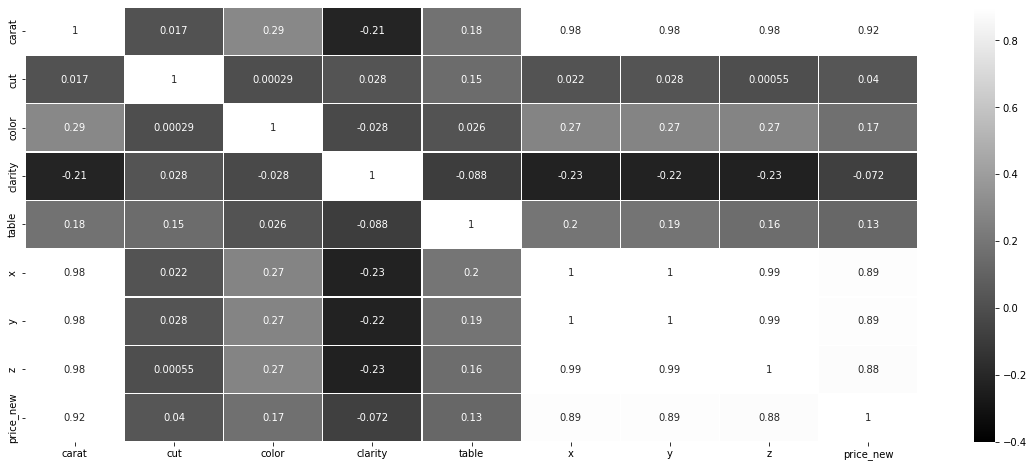

In [152]:
corr_matrix = data2.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_matrix,vmin=-0.4,vmax=0.9,linewidth=0.2,annot=True,cmap='gray')